# Liner Regression with mpg dataset

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imoort train test split
from sklearn.model_selection import train_test_split

# Note, seaborn is not available in Jupyter Lite, use Collab or a local environment
import seaborn as sns # we use this library to load the dataset

## Pandas References

You can use `pandas_summary` file throughout this notebook to get a quick reference to pandas functions. The file is located in the same directory as this notebook.|


## Load data

In [3]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
# df stands for dataframe

df = sns.load_dataset('mpg')  # Dummy data just like the iris dataset that we got from the library 

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

#### What is the type of the dateset? (type(df))

In [4]:
#your code here

# shape -> check the dimension of the dataframe

print(type(df)) # Check the type of the dataframe

<class 'pandas.core.frame.DataFrame'>


`DataFrame` is a fundamental Pandas structure. It is essentially a table with rows and columns. You can think of it as a spreadsheet or SQL table. DataFrames are particularly useful because they can handle a large amount of data and are very fast.

#### Show the first 5 rows of the dataset

In [5]:
#your code here

df.head() # display the first 5 rows of the dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Data Preprocessing


Since most cars weight around 1-2 tons, it's convenient to convert the weight to metric tons here

$
\text{tons} = \frac{\text{pounds}}{2000}
$

Converting gas usage to Litres per 100km is important to get a better linear fit

$
\text{LPHK} = \frac{235.214}{\text{MPG}}
$


#### Change the weight column to metric tons and add one column for LPHK

In [6]:
# Use dictionary / associative array to access the column
print(df["weight"]) # -> This will display the whole column

df["weight"] = df["weight"] / 2000
print(df["weight"]) # => this will display the coulmn after the operation


df["LPHK"] = 235.214 / df["mpg"]
print(df["LPHK"])


df.head() # LPHK is now added to the dataframe

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64
0      1.7520
1      1.8465
2      1.7180
3      1.7165
4      1.7245
        ...  
393    1.3950
394    1.0650
395    1.1475
396    1.3125
397    1.3600
Name: weight, Length: 398, dtype: float64
0      13.067444
1      15.680933
2      13.067444
3      14.700875
4      13.836118
         ...    
393     8.711630
394     5.345773
395     7.350437
396     8.400500
397     7.587548
Name: LPHK, Length: 398, dtype: float64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,LPHK
0,18.0,8,307.0,130.0,1.7520,12.0,70,usa,chevrolet chevelle malibu,13.067444
1,15.0,8,350.0,165.0,1.8465,11.5,70,usa,buick skylark 320,15.680933
2,18.0,8,318.0,150.0,1.7180,11.0,70,usa,plymouth satellite,13.067444
3,16.0,8,304.0,150.0,1.7165,12.0,70,usa,amc rebel sst,14.700875
4,17.0,8,302.0,140.0,1.7245,10.5,70,usa,ford torino,13.836118


### Handing missing data

In [7]:
# We will use these 4 columns as potential explanatory variables for fuel consumption (lphk)
fit_cols = ['weight', 'cylinders', 'displacement', 'horsepower']

# Discard several rows with missing values in the columns we want to use for fitting

# Dropna -> Clean up the data and make sure that everything is fitting nicely into that cube or into that matrix of data
# subset -> 
df = df.dropna(subset=fit_cols)
# or df = df.dropna(subset=['weight', 'cylinders', 'displacement', 'horsepower'])


#### Use df.head() again to see the changes (unit conversion and missing data)

In [8]:
# your code here
df.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,LPHK
0,18.0,8,307.0,130.0,1.7520,12.0,70,usa,chevrolet chevelle malibu,13.067444
1,15.0,8,350.0,165.0,1.8465,11.5,70,usa,buick skylark 320,15.680933
2,18.0,8,318.0,150.0,1.7180,11.0,70,usa,plymouth satellite,13.067444
3,16.0,8,304.0,150.0,1.7165,12.0,70,usa,amc rebel sst,14.700875
4,17.0,8,302.0,140.0,1.7245,10.5,70,usa,ford torino,13.836118


#### Take a look at df.shape, how many cars are in this dataset, and how many features per car?

In [9]:
# your code here
df.shape

(392, 10)

### Important Notes

You can access columns in both notations `df['weight']` or `df.weight`.  
But if you want to define a new column, it must be `df['new_col_name']`

## Data Visualization

#### Plot a histogram of car weights

#### pass `edgecolor='black'` to buitify the histogram

(array([30., 89., 58., 52., 36., 40., 29., 34., 18.,  6.]),
 array([0.8065 , 0.98285, 1.1592 , 1.33555, 1.5119 , 1.68825, 1.8646 ,
        2.04095, 2.2173 , 2.39365, 2.57   ]),
 <BarContainer object of 10 artists>)

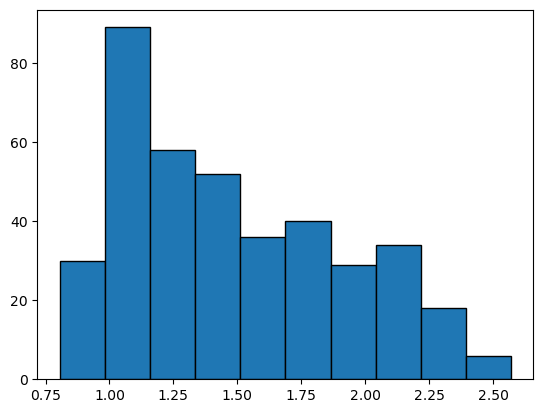

In [10]:
#your code here
plt.hist(df["weight"], edgecolor='black')

#### Plot a histogram of the `model_year`

#### Pandas has a convenience function to plot histograms, but it uses the same matplotlib library. You can call the hist() on the column of a DataFrame. Try it.

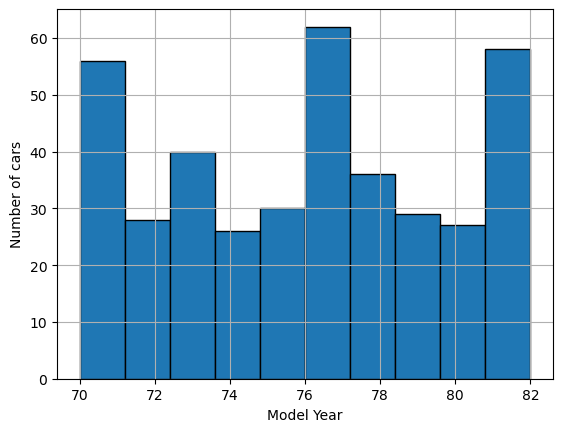

In [11]:
# your code here
df["model_year"].hist(edgecolor='black')  # This is the plt.hist() version inside the pandas library
plt.xlabel("Model Year") # we can use plt.xlable and plt.ylabel functions to add the lables to the pandas histogram
plt.ylabel("Number of cars")
plt.show()

#### You can also call `aggregate` functions on a DataFrame column, like `min`, `max`, `mean`, `median`, etc. Try it.

#### Compute the average and the median weight

In [12]:
#your code here

mean = df["weight"].mean()
print(mean)

median = df["weight"].median() # middle value 
print(median) 

1.4887920918367346
1.4017499999999998


If you sum all elements of a boolean array, False is treated as 0 and True as 1. Therefore `bool_array.sum()` is the number of True elements in the array. For example `(df.weight > 2).sum()` is the number of models that weight above 2 tons.

#### Find the number of cars that weight more than 2 tons

In [13]:
# your code here

print(df["weight"]>2) # This returns to us a dataframe which can be used with more df methods
numHeavyCars = (df["weight"] > 2).sum() # This will return the number of cars that have a weight greater than 2
print(numHeavyCars)

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: weight, Length: 392, dtype: bool
64


#### Find how many cars there are for each number of cylinders

In [14]:
#your code here

num_cars_with_cylinders = df["cylinders"].value_counts() # This will return the number of cars that have a certain number of cylinders
print(num_cars_with_cylinders)

df["cylinders"].max()
for numCyl in (range(1, df["cylinders"].max() + 1)):
  count = (df["cylinders"] == numCyl).sum()
  print(str(numCyl) + " num cylinders has " + str(count) + "number of cars associated")

    



cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64
1 num cylinders has 0number of cars associated
2 num cylinders has 0number of cars associated
3 num cylinders has 4number of cars associated
4 num cylinders has 199number of cars associated
5 num cylinders has 3number of cars associated
6 num cylinders has 83number of cars associated
7 num cylinders has 0number of cars associated
8 num cylinders has 103number of cars associated


#### Find what are the car models with unusual number of cylinders (3 or 5)

In [15]:
threeCylCarModels = (df["cylinders"] == 3)    # condition to check if the car has 3 cylinders
fiveCylCarModels = (df["cylinders"] == 5)     # condition to check if the car has 5 cylinders

print(threeCylCarModels)
print(fiveCylCarModels)


0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: cylinders, Length: 392, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: cylinders, Length: 392, dtype: bool


#### Use `df.describe()` to explore the dataset. What years does it cover? What are the extremes of car weight?

In [16]:
# your code 

print(df.describe()) # after remove the empy row
print(df)

              mpg   cylinders  displacement  horsepower      weight  \
count  392.000000  392.000000    392.000000  392.000000  392.000000   
mean    23.445918    5.471939    194.411990  104.469388    1.488792   
std      7.805007    1.705783    104.644004   38.491160    0.424701   
min      9.000000    3.000000     68.000000   46.000000    0.806500   
25%     17.000000    4.000000    105.000000   75.000000    1.112625   
50%     22.750000    4.000000    151.000000   93.500000    1.401750   
75%     29.000000    8.000000    275.750000  126.000000    1.807375   
max     46.600000    8.000000    455.000000  230.000000    2.570000   

       acceleration  model_year        LPHK  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592   11.248505  
std        2.758864    3.683737    3.913829  
min        8.000000   70.000000    5.047511  
25%       13.775000   73.000000    8.110828  
50%       15.500000   76.000000   10.340326  
75%       17.025000   79.000000   13.8

#### Find the lightest and heaviest cars, what make and model are they?

In [17]:
# your code here

print(df["weight"].min())
lightestCar = df[(df["weight"] == df["weight"].min()) | (df["weight"] == df["weight"].max())] # where the weight is equal to the minimum weight
print(lightestCar)

0.8065
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
44  13.0          8         400.0       175.0  2.5700          12.0   
54  35.0          4          72.0        69.0  0.8065          18.0   

    model_year origin                 name       LPHK  
44          71    usa  pontiac safari (sw)  18.093385  
54          71  japan          datsun 1200   6.720400  


#### Find the most fuel efficient car (minimum lphk)

In [18]:
#your code here
mostEfficentCar = df[df["LPHK"] == df["LPHK"].min()]
print(mostEfficentCar)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0   1.055          17.9   

     model_year origin       name      LPHK  
322          80  japan  mazda glc  5.047511  


#### For each of the columns in `fit_cols` plot `lphk` as a function of that column (`lphk`  on the `y` axis). Check if any linear relationship is clearly visible

####  pass `alpha=0.5` to plt.scatter to make the points semi-transparent

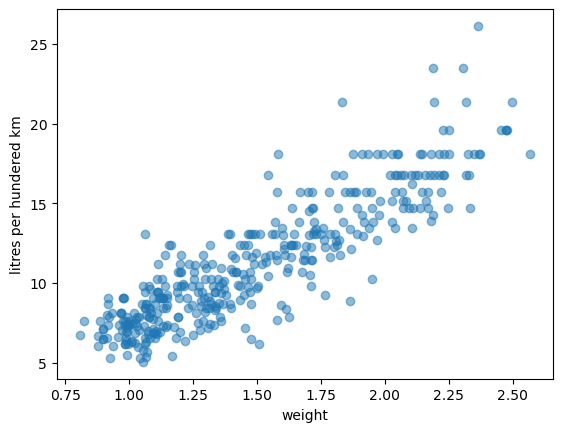

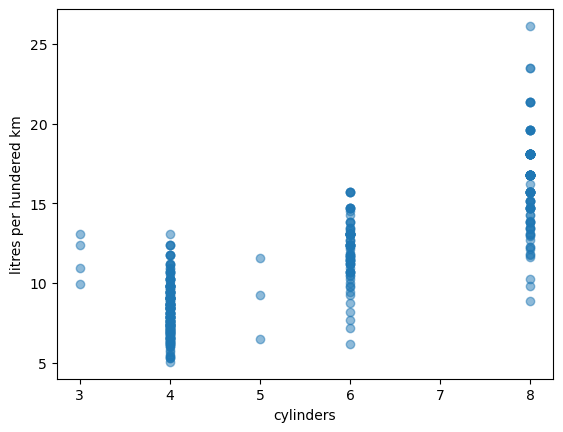

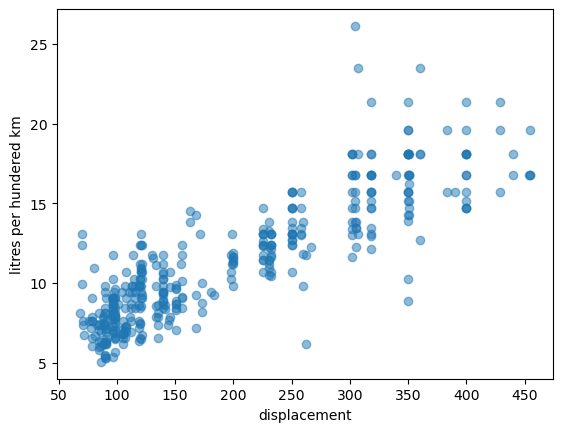

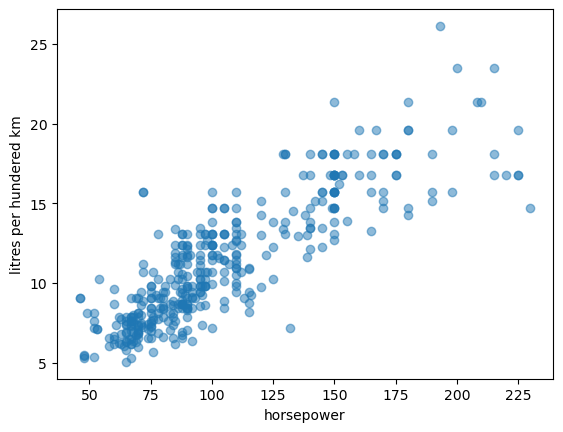

In [19]:
# we want to look for any relationships in the data so that we can... Choose the model BinaryClass, KNN, linear Regression, Decision Tree, Random Forest, SVM, Neural Network

#fit.cols = ['weight', 'cylinders', 'displacement', 'horsepower']

for col in fit_cols:
    plt.scatter(df[col], df.LPHK, label=col, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("litres per hundered km")
    plt.show()

## Linear Fit using 1 variable - weight

#### OBJECTIVE

- Fit a line to the (training) data using the `weight` column as the independent variable and `lphk` as the dependent variable

- predict the `lphk` for test data

#### Split the data into training and testing sets (`random_state=123`)


In [20]:
# By looking at the visualized data above, we see that there are some linear relationships
# Therefore, choose model : Linear Regression
X = df['weight'] # This was one of the linear relationships we saw
y = df['LPHK']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Plot training data and testing data on the same scatter plot

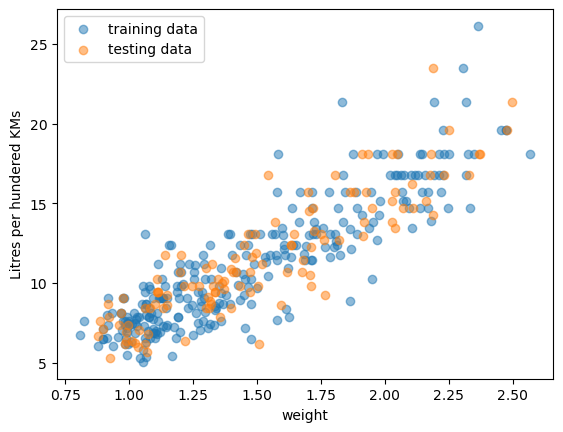

In [22]:
#your code here
plt.scatter(X_train, y_train, label="training data", alpha=0.5)
plt.scatter(X_test, y_test, label="testing data", alpha=0.5)
plt.xlabel("weight")
plt.ylabel("Litres per hundered KMs")
plt.legend()
plt.show()

#### To fit a line, we need to find the slope and intercept of a line.

![linear equation](https://www.katesmathlessons.com/uploads/1/6/1/0/1610286/2964252_orig.png)
![linear graph](https://www.katesmathlessons.com/uploads/1/6/1/0/1610286/1163738_orig.png)

#### First let's run a fit using np.polyfit to get the line slope and intercept

In [23]:
m, b = np.polyfit(X_train, y_train, 1)  # The third arg - degree of 1 - represents linear regression 
# a is slope, b is intercept
m, b 

# y = mx + b Degree 1 equation ( 1 차 방정식 )
# y = ax ** 2 + bx + c Degree 2 equation ( 2차 방정식 )

(8.158615530142475, -0.9132759011979995)

#### Plot the training data and the line 

#### you need to draw a line using the slope and intercept you found -  the range of x values should be the same as the range of the training data [0.75 - 2.5]

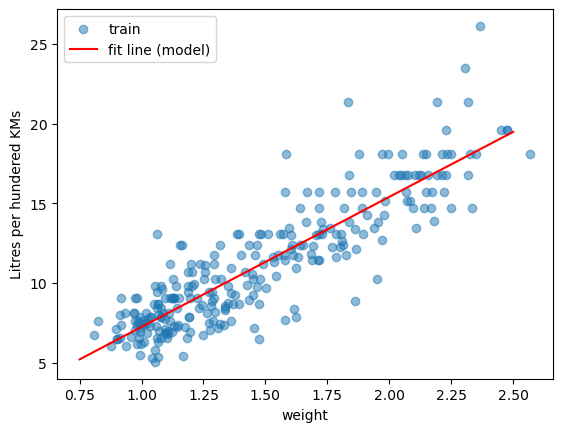

In [24]:
x = np.linspace(0.75, 2.5, 100) # Draw a line - line-of-best-fit for passing through the linear data
y = m*x + b

plt.scatter(X_train, y_train, label='train', alpha=0.5)
plt.plot (x, y, color='red', label='fit line (model)')
plt.xlabel('weight')
plt.ylabel('Litres per hundered KMs')
plt.legend()

#### Using a and b, what will be the predicted consumption of a hypothetical car weighting 1.2 tons?

In [25]:
#your code here
y = m*1.2 + b # manual version of running a linear regression algorithm
print(y)

8.87706273497297


#### Now predict the consumption for a sample car in test set for example X_test[0]

In [26]:
#your code here
y_pred = m*X_test[0] + b
print(y_pred)


13.380618507611615


#### Plot the fitted line (model) and show the X_test[0] and y_test[0] and y_predicted on the same plot

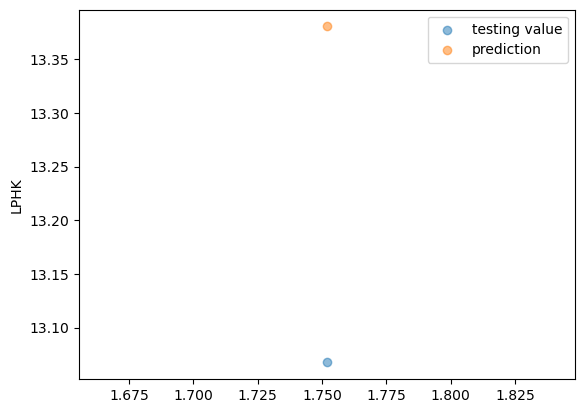

In [27]:
#your code here
plt.scatter(X_test[0], y_test[0], label='testing value', alpha=0.5)
plt.scatter(X_test[0], y_pred, label="prediction", alpha=0.5)
plt.ylabel("LPHK")
plt.legend()
plt.show()


#### Comput the error beteween the predicted value and the actual value

In [28]:
#your code here
error = (y_test[0] - y_pred) **2 # Why did we use exponenet of 2. Exponenet of 2 on a number < 1 makes the number e ven smaller. 
# Results in another number that is even smaller. This is a way to make the error even smaller
# Error values are usually between 0 - 1 . Related to Normalization.
# This equation is predefined by statisicians -> simply another metric like accuracy and root mean squared error
print(error)


0.09807799384063529


#### (1)take 10  points from the test set 

#### (2) find the prediction for the 10 points 

#### (3) plot the true and predicted values besides the fitted line (model)

#### (4 )compute the average error 

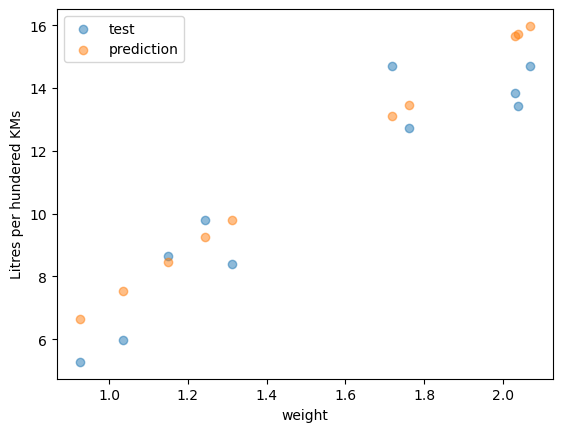

Average error: 1.9815827814613196


In [29]:
#your code here

X_test_samples = X_test[:10]
y_test_samples = y_test[:10]

y_sample_preds = m * X_test_samples + b  # Do we define m and b again? No since already define during training stage using polyfit()

plt.scatter(X_test_samples, y_test_samples, label="test", alpha=0.5)
plt.scatter(X_test_samples, y_sample_preds, label="prediction", alpha=0.5)
plt.xlabel("weight")
plt.ylabel("Litres per hundered KMs")
plt.legend()
plt.show()


# Calculate the average error - Punish larger errors more than smaller errors

error_samples = sum((y_test_samples - y_sample_preds) ** 2) / len(y_test_samples)
print(f"Average error: {error_samples}")

#### Numerical estimate of how good this fit is
 - One common measure for the quality of a linear fit is the mean square error (MSE)
 - Assume that $y_i$ is the real value from data and $\hat{y}_i$ is the predicted value found as $\hat{y}_i = ax_i + b$
 - Taking the differences between the real and predicted values, then squaring them as $(y_i - \hat{y}_i)^2$ and then averaging gives the MSE
 
$MSE = \frac{1}{N} \sum{(y_i - \hat{y}_i)^2}$

#### Find the MSE for this fit and name it `y_pred1`

In [30]:
# m -> slope, b -> intercept
y_pred1 = m * X_test + b
print(y_pred1)
print(type(y_pred1))

error_all = sum((y_pred1 - y_test) ** 2) / len(y_test)
print(f"The average error is {error_all}")

222    15.648714
247     7.530891
136    15.979138
149     9.240121
396     9.794907
         ...    
186     8.069360
281    11.283854
177    10.076379
175     6.988343
106    17.439530
Name: weight, Length: 118, dtype: float64
<class 'pandas.core.series.Series'>
The average error is 3.1070355767277245


## Same fit using sklearn.linear_models.LinearRegression
The 4 steps of model use in sklearn:
 1. Import (the Python class for the model you want to use)
 2. Instantiate (the class to create an object)
 3. Fit
 4. Predict
 
Just run the steps below, no need to modify this code

#### 1. Import

In [31]:
from sklearn.linear_model import LinearRegression

#### 2. Instantiate

In [32]:
model = LinearRegression()

#### 3. Fit

#### fit() expects a 2D data structure: `2D numpy array` or a `pd.DataFrame` for X

#### Printing `X_train` and also `type(X_train)`

In [33]:
print(type(X_train))
print(X_train)

<class 'pandas.core.series.Series'>
5      2.1705
237    1.0255
335    1.2500
19     0.9175
29     1.0650
        ...  
232    2.1675
99     1.4725
324    1.0550
388    1.2925
370    1.2875
Name: weight, Length: 274, dtype: float64


#### As you can see the type of X_train, X_test are `Series`.  

#### `Series` and `DataFrame` are two main data structures in pandas. 

#### `Series` is 1D, 

#### and `DataFrame` is a multi-dimensional table made up of a collection of Series.

#### We can need to make `DataFrame` form `X_train` and `X_test` `Series` using `pd.DataFrame()`

In [34]:
X_train_df = pd.DataFrame(X_train)
X_train_df

,weight
5,2.1705
237,1.0255
335,1.2500
19,0.9175
29,1.0650
...,...
232,2.1675
99,1.4725
324,1.0550
388,1.2925


you can see the difference in the form of printing output for `Series` and `DataFrame` types. 

#### Having X_train as a data frame, fit the model

In [35]:
#solution
model.fit(X_train_df, y_train)

LinearRegression()

#### 4. Predict

#### predict() takes a 2D array or pd.DataFrame with the same as used in fit() 

#### Change the `X_test` type from `Series` to `DataFrame` and then predict the values for the test set

### name your prediction `y_pred_test`

In [36]:
# Ml Algorithm step : Testing (#3)

X_test_df = pd.DataFrame(X_test)
model.predict(X_test_df)

array([15.64871362,  7.53089117, 15.97913755,  9.24012113,  9.79490698,
       13.1154635 ,  8.46913196, 13.46628397, 15.73029978,  6.63344346,
       16.28100633, 11.89575048, 14.79205899,  7.55128771, 15.62831709,
       11.25937847,  8.46913196, 19.471025  , 15.80372732, 13.80894582,
       11.4837404 ,  8.14278734,  9.77451044,  6.26630577,  7.14335693,
       14.67375907,  9.69292429,  7.83275995, 11.10028547,  6.56817454,
       13.13993935,  9.71332083, 12.49948803, 11.05133377, 11.38583701,
       10.14572745,  7.7552531 , 10.50878584,  9.46856236, 16.93777488,
       14.87364515, 12.79319819,  8.9096972 , 13.48668051,  9.88873106,
       11.67546786, 10.20283776,  9.83570006,  8.8566662 , 12.40158464,
        9.98663445,  7.44930502, 16.72973018, 13.05835319, 12.99716358,
       16.95409211, 18.44711875,  8.14278734, 10.643403  ,  7.20454655,
       16.30140287, 19.29969407,  8.1754218 , 10.28442391, 14.71047284,
        6.61304693,  7.85723579, 11.18187162, 10.63116507, 11.37

#### Take a look at `model.coef_` and `model.intercept_` and compare them to a and b from before

In [37]:
model.coef_, model.intercept_

(array([8.15861553]), -0.9132759011980038)

In [38]:
# recalling the value of a and b
m , b

(8.158615530142475, -0.9132759011979995)

#### sklearn comes with a variety of metrics used to estimate quality of models, including the MSE. 

#### Run the cell below and verify that the result is the same as the one you got before

In [39]:
from sklearn import metrics

# Predict the values for the test set
X_test_df = pd.DataFrame(X_test)
y_pred_test = model.predict(X_test_df)

# Calculate the mean squared error
test_error = metrics.mean_squared_error(y_test, y_pred_test)
test_error

3.107035576727725

#### predict the values for the TRAIN set

#### name your prediction `y_pred_train`

#### Find the MSE for train set

In [40]:
y_pred_train = model.predict(X_train_df)
print(y_pred_train)

train_error = metrics.mean_squared_error(y_train, y_pred_train)
train_error

[16.79499911  7.45338432  9.28499351  6.57225385  7.77564964  8.0163288
  8.67309735 10.32521699  8.84034897 11.67138855 13.2215255  14.96338992
 19.28337684  7.94290126  7.10256386 12.55659834  9.08510743 15.71806186
  5.66664752  8.77508004  8.32635619 10.87592354  5.8135026  17.29675396
  7.32284648  8.1223908   7.77564964  7.83683925  7.89802887 13.15625658
 17.19885058 14.28214552 14.3229386   7.25757755  7.10256386 13.08690835
  8.42018027  7.88987026 17.43545043 10.18244122  8.18358041  7.77564964
 18.07182244 16.52168549  8.88114204  7.04137424  9.30946936  8.7546835
  7.18415001 11.1696337  12.01405041 10.9575097  19.28745615  8.8566662
  9.38697621  7.42890848  9.55014852  6.89859847  9.85201729 10.97382693
  6.40908154 16.67669918  7.20454655 16.53800272 11.33688532 13.44588743
 16.07704094 17.26819881  6.53146077  9.45632444  7.00058116  7.68590487
 13.79262859 15.97505825  6.53146077  7.74709448 16.25653048 12.66673965
  7.18415001  8.19989765 12.11195379  6.42947808  7.75

3.398583843646591

## Multiple explanatory variables
Regression with multiple explanatory variables
is no different from the simple case with one variable we just saw, the prediction for 3 explanatory variables looks like this:

$ \hat{y} = a_1 x_1 + a_2 x_2 + a_3 x_3 + b $

The coefficients in `linreg.coef_` will be `[a1, a2, a3]` after the fit()

#### Using the X with all columns from `fit_cols` copy and repeat the fit and predict steps above to obtain a new fit
 - Import is no longer needed since the LinearRegression class is already imported
 - It's up to you whether to instantiate a new object or reuse the old one. It's considered to be a good practice to create a new one in such cases, since it reduced the risk of confusion, but it's not a strict rule.

In [41]:
# Use X with all columns in fit_cols
X = df[fit_cols]  # columns we had chosen based on our feature engineering
y = df['LPHK']  # we chose liters per km as the answer 
X.head()  # display the first 5 rows of the dataframe

,weight,cylinders,displacement,horsepower
0,1.7520,8,307.0,130.0
1,1.8465,8,350.0,165.0
2,1.7180,8,318.0,150.0
3,1.7165,8,304.0,150.0
4,1.7245,8,302.0,140.0


In [42]:
print(X.shape)
print(y.shape)

(392, 4)
(392,)


In [43]:
model_miltiple = LinearRegression()
model_miltiple.fit(X, y)

LinearRegression()

In [44]:
model_miltiple.coef_, model_miltiple.intercept_

(array([ 4.72123297e+00,  3.34412018e-01, -1.89027559e-03,  3.39998567e-02]),
 -0.7947638154405521)

#### Take a look at the coefficients (they come in the same order as columns in X)

In [45]:
list(zip(X.columns, model_miltiple.coef_))

[('weight', 4.721232968595036),
 ('cylinders', 0.33441201756575784),
 ('displacement', -0.0018902755888942563),
 ('horsepower', 0.03399985672476921)]

#### Use `metrics.mean_squared_error()` to compute the MSE again. Does it mean we got a better or worse fit?

In [46]:
mse2 = metrics.mean_squared_error(y, model_miltiple.predict(X))
mse2

2.7834576195587077

#### Compare this erro with the train_error + test_error in the previous section

In [47]:
# your code here

#### Try excluding each of the 4 columns from the X (one at a time), run the fit and compute MSE each time. Which of the column results in the largest degradation in quality of fit when removed?
 - This can be interpreted as an estimate of importance of that column in explaining the dependant variable

In [ ]:
# Use this to choose your features for Assignment 3

print("The mean squared error: for all columns is ", mse2)

for col_exclude in fit_cols:
  fit_cols_new = [each_col_included for each_col_included in fit_cols if each_col_included != col_exclude]
  X_1_excluded = df[fit_cols_new]

  # Train
  model_miltiple.fit(X_1_excluded, y)

  # Test
  y_predict = model_miltiple.predict(X_1_excluded)

  mse_1_excluded = metrics.mean_squared_error(y, y_predict)
  print(f"which column exlucded: {col_exclude}")
  print(mse_1_excluded)

The mean squared error: for all columns is  2.7834576195587077
which column exlucded: weight
3.2815266472572606
which column exlucded: cylinders
2.8140611578161803
which column exlucded: displacement
2.7854780279964664
which column exlucded: horsepower
3.103813766002495


#### Which of the 4 columns is least valuable for the fit?

#your answer here: 
Displacement


What columns should we choose?

All of them, because the error was lowest when we did not erase any columns